In [20]:
import numpy as np
from keras.datasets import mnist

import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'malgun gothic'

(x_train_2d, _), (_, _) = mnist.load_data()
x_train_2d = x_train_2d.astype(np.float32) / 255.0
x_train = x_train_2d.reshape(-1, np.prod(x_train_2d.shape[1:])) 

input_dim = x_train.shape[1]
encoding_dim = 32

autoencoder1 = Sequential()
autoencoder1.add(Dense(encoding_dim, input_dim=input_dim, activation='relu'))
autoencoder1.add(Dense(input_dim, activation='sigmoid'))
autoencoder1.compile(optimizer="adam", loss="binary_crossentropy")

In [21]:
history = autoencoder1.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, verbose=0)

1/1 [==============================] - 0s 60ms/step


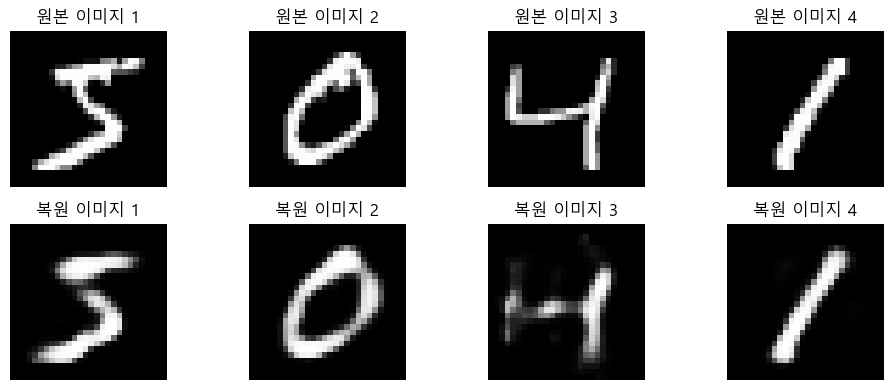

In [22]:
n = 4
x_train_recoverd = autoencoder1.predict(x_train[:n, :])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()

In [23]:
encoding_dim1 = 128
encoding_dim2 = 64
encoding_dim3 = 32

autoencoder2 = Sequential()
autoencoder2.add(Dense(encoding_dim1, input_dim=input_dim, activation='relu'))
autoencoder2.add(Dense(encoding_dim2, activation='relu'))
autoencoder2.add(Dense(encoding_dim3, activation='relu'))
autoencoder2.add(Dense(encoding_dim2, activation='relu'))
autoencoder2.add(Dense(encoding_dim1, activation='relu'))
autoencoder2.add(Dense(input_dim, activation='sigmoid'))
autoencoder2.compile(optimizer="adam", loss="binary_crossentropy")
history = autoencoder2.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, verbose=0)

1/1 [==============================] - 0s 170ms/step


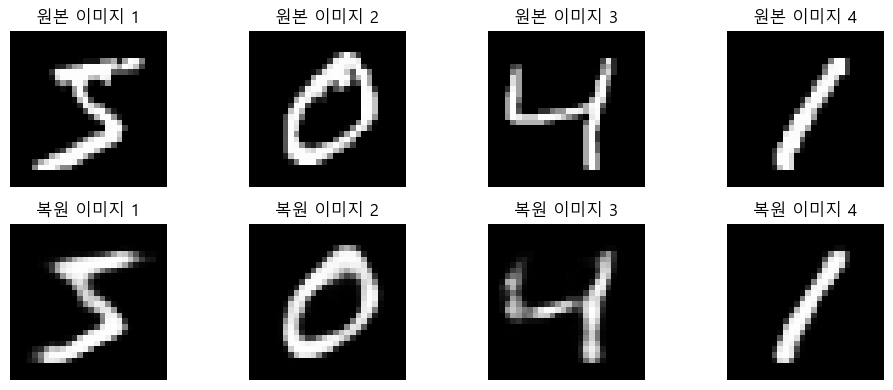

In [28]:
n = 4
x_train_recoverd = autoencoder2.predict(x_train[:n, :])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()

In [32]:
x_train_2d_c = np.expand_dims(x_train_2d, -1)
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

autoencoder3 = Sequential()

# 인코딩
autoencoder3.add(Conv2D(16, 3, input_shape=(28, 28, 1), activation='relu', padding='same'))
autoencoder3.add(MaxPooling2D(2, padding='same'))
autoencoder3.add(Conv2D(32, 3, activation='relu', padding='same'))
autoencoder3.add(MaxPooling2D(2, padding='same'))

# 디코딩
autoencoder3.add(UpSampling2D(2))
autoencoder3.add(Conv2D(16, 3, activation='relu', padding='same'))
autoencoder3.add(UpSampling2D(2))
autoencoder3.add(Conv2D(1, 3, activation='relu', padding='same'))

autoencoder3.compile(optimizer="adam", loss="binary_crossentropy")

autoencoder3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                     

In [27]:
%%time
history = autoencoder3.fit(x_train_2d_c, x_train_2d_c, 
                           epochs=10, batch_size=256, shuffle=True, verbose=0)

CPU times: total: 54min 52s
Wall time: 10min 30s


1/1 [==============================] - 0s 40ms/step


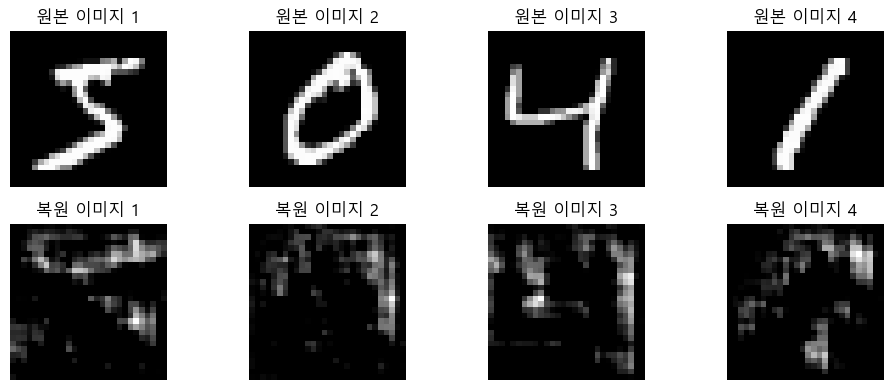

In [34]:
n = 4
x_train_recoverd = autoencoder3.predict(x_train_2d_c[:n])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train_2d[i])
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")
    
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()